# How to classify MNIST digits with a simple convolution neural network architecture?

> Enzo Sergiani


In [157]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense  # Dense layers are "fully connected" layers
from tensorflow.keras.models import (
    Sequential,
)  # Documentation: https://keras.io/models/sequential/
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, AveragePooling2D
from keras.optimizers import Adam

Load the MNIST data (or downlaod it if not already done)


In [158]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [159]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Prepare and convert the data


In [160]:
np.set_printoptions(
    linewidth=150
)  # Enlarge the line the see all the element in one column
print(x_train[42])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   1  26 111 195 230  30   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  28 107 195 254 254 254 244  20   

In [161]:
print(y_train[42])

7


In [162]:
print(
    "Training data shape: ", x_train.shape
)  # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape", x_test.shape)  # (10000, 28, 28) -- 10000 images, each 28x28
# Flatten the images
image_vector_size = 28 * 28  # = 784
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)

Training data shape:  (60000, 28, 28)
Test data shape (10000, 28, 28)


In [163]:
print(
    "Training data shape: ", x_train.shape
)  # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape", x_test.shape)

Training data shape:  (60000, 784)
Test data shape (10000, 784)


In [164]:
print("Training label shape: ", y_train.shape)  # (60000,) -- 60000 numbers (all 0-9)
print("First 5 training labels: ", y_train[:10])  # [5, 0, 4, 1, 9]

# Convert to "one-hot" vectors using the to_categorical function
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print("First 5 training lables as one-hot encoded vectors:\n", y_train[:10])

Training label shape:  (60000,)
First 5 training labels:  [5 0 4 1 9 2 1 3 1 4]
First 5 training lables as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [165]:
print(y_train[42])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [166]:
input_shape = (28, 28, 1)
kernel_size = (3, 3)
pool_size = (2, 2)

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

model = keras.Sequential()
model.add(
    Conv2D(
        filters=6, kernel_size=kernel_size, activation="relu", input_shape=input_shape
    )
)
model.add(AveragePooling2D(pool_size=pool_size))
model.add(Conv2D(filters=16, kernel_size=kernel_size, activation="relu"))
model.add(AveragePooling2D(pool_size=pool_size))
model.add(Flatten())
model.add(Dense(units=120, activation="relu"))
model.add(Dense(units=84, activation="relu"))
model.add(Dense(units=10, activation="softmax"))

model.compile(
    loss="sparse_categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"]
)

model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 26, 26, 6)      │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_24            │ (None, 13, 13, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 11, 11, 16)     │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_25            │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,074 (234.66 KB)

 Trainable params: 60,074 (234.66 KB)

 Non-trainable params: 0 (0.00 B)

Compile, train and evaluate the model


In [167]:
model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

In [168]:
history = model.fit(
    x_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.1
)
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6455 - loss: 2.0753 - val_accuracy: 0.9533 - val_loss: 0.1620
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9464 - loss: 0.1865 - val_accuracy: 0.9688 - val_loss: 0.1131
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9594 - loss: 0.1317 - val_accuracy: 0.9745 - val_loss: 0.0930
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9680 - loss: 0.1061 - val_accuracy: 0.9783 - val_loss: 0.0833
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9717 - loss: 0.0958 - val_accuracy: 0.9778 - val_loss: 0.0838
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9661 - loss: 0.1004


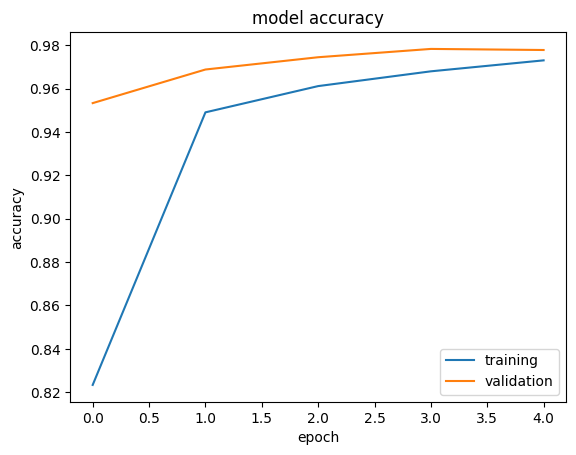

Test loss: 0.0821
Test accuracy: 0.974


In [169]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["training", "validation"], loc="best")
plt.show()

print(f"Test loss: {loss:.3}")
print(f"Test accuracy: {accuracy:.3}")

In [170]:
print(model.predict(np.array([x_train[42]])))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
[[9.1605858e-07 1.5692905e-03 2.4089711e-03 9.8426419e-04 7.8463627e-06 4.1264528e-05 7.4712563e-07 9.9104744e-01 2.2699789e-03 1.6692979e-03]]


In [171]:
print(np.round(model.predict(np.array([x_train[42]])), decimals=2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[[0.   0.   0.   0.   0.   0.   0.   0.99 0.   0.  ]]


In [172]:
print(np.round(model.predict(np.array([x_train[42]]))))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [173]:
print(np.argmax(model.predict(np.array([x_train[42]]))))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
7


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted labels: [7 2 1 ... 4 5 6]
True labels: [7 2 1 ... 4 5 6]
Indices of incorrect predictions: [  18  247  318  320  321  326  340  412  445  449  492  511  543  551  582  583  619  659  674  684  720  726  740  810  844  846  882  898  926
  938  947  956  965 1014 1032 1039 1107 1112 1114 1156 1166 1173 1182 1194 1224 1226 1232 1242 1247 1263 1299 1319 1326 1331 1337 1355 1364 1378
 1393 1414 1425 1438 1500 1522 1527 1530 1543 1549 1553 1554 1581 1621 1641 1678 1681 1709 1717 1721 1722 1754 1773 1790 1822 1850 1903 1911 1941
 2016 2024 2035 2040 2070 2098 2118 2129 2130 2189 2266 2272 2280 2293 2326 2369 2387 2406 2414 2433 2447 2454 2488 2573 2597 2607 2618 2631 2654
 2658 2742 2780 2896 2939 2952 2995 3005 3060 3073 3100 3122 3225 3240 3289 3316 3330 3333 3448 3475 3490 3503 3520 3549 3597 3604 3681 3702 3726
 3751 3767 3778 3796 3806 3808 3811 3818 3838 3850 3856 3893 3906 3926 3941 3968 3971 4007 4044 4065 4075 4078 4093 4100 4205 42

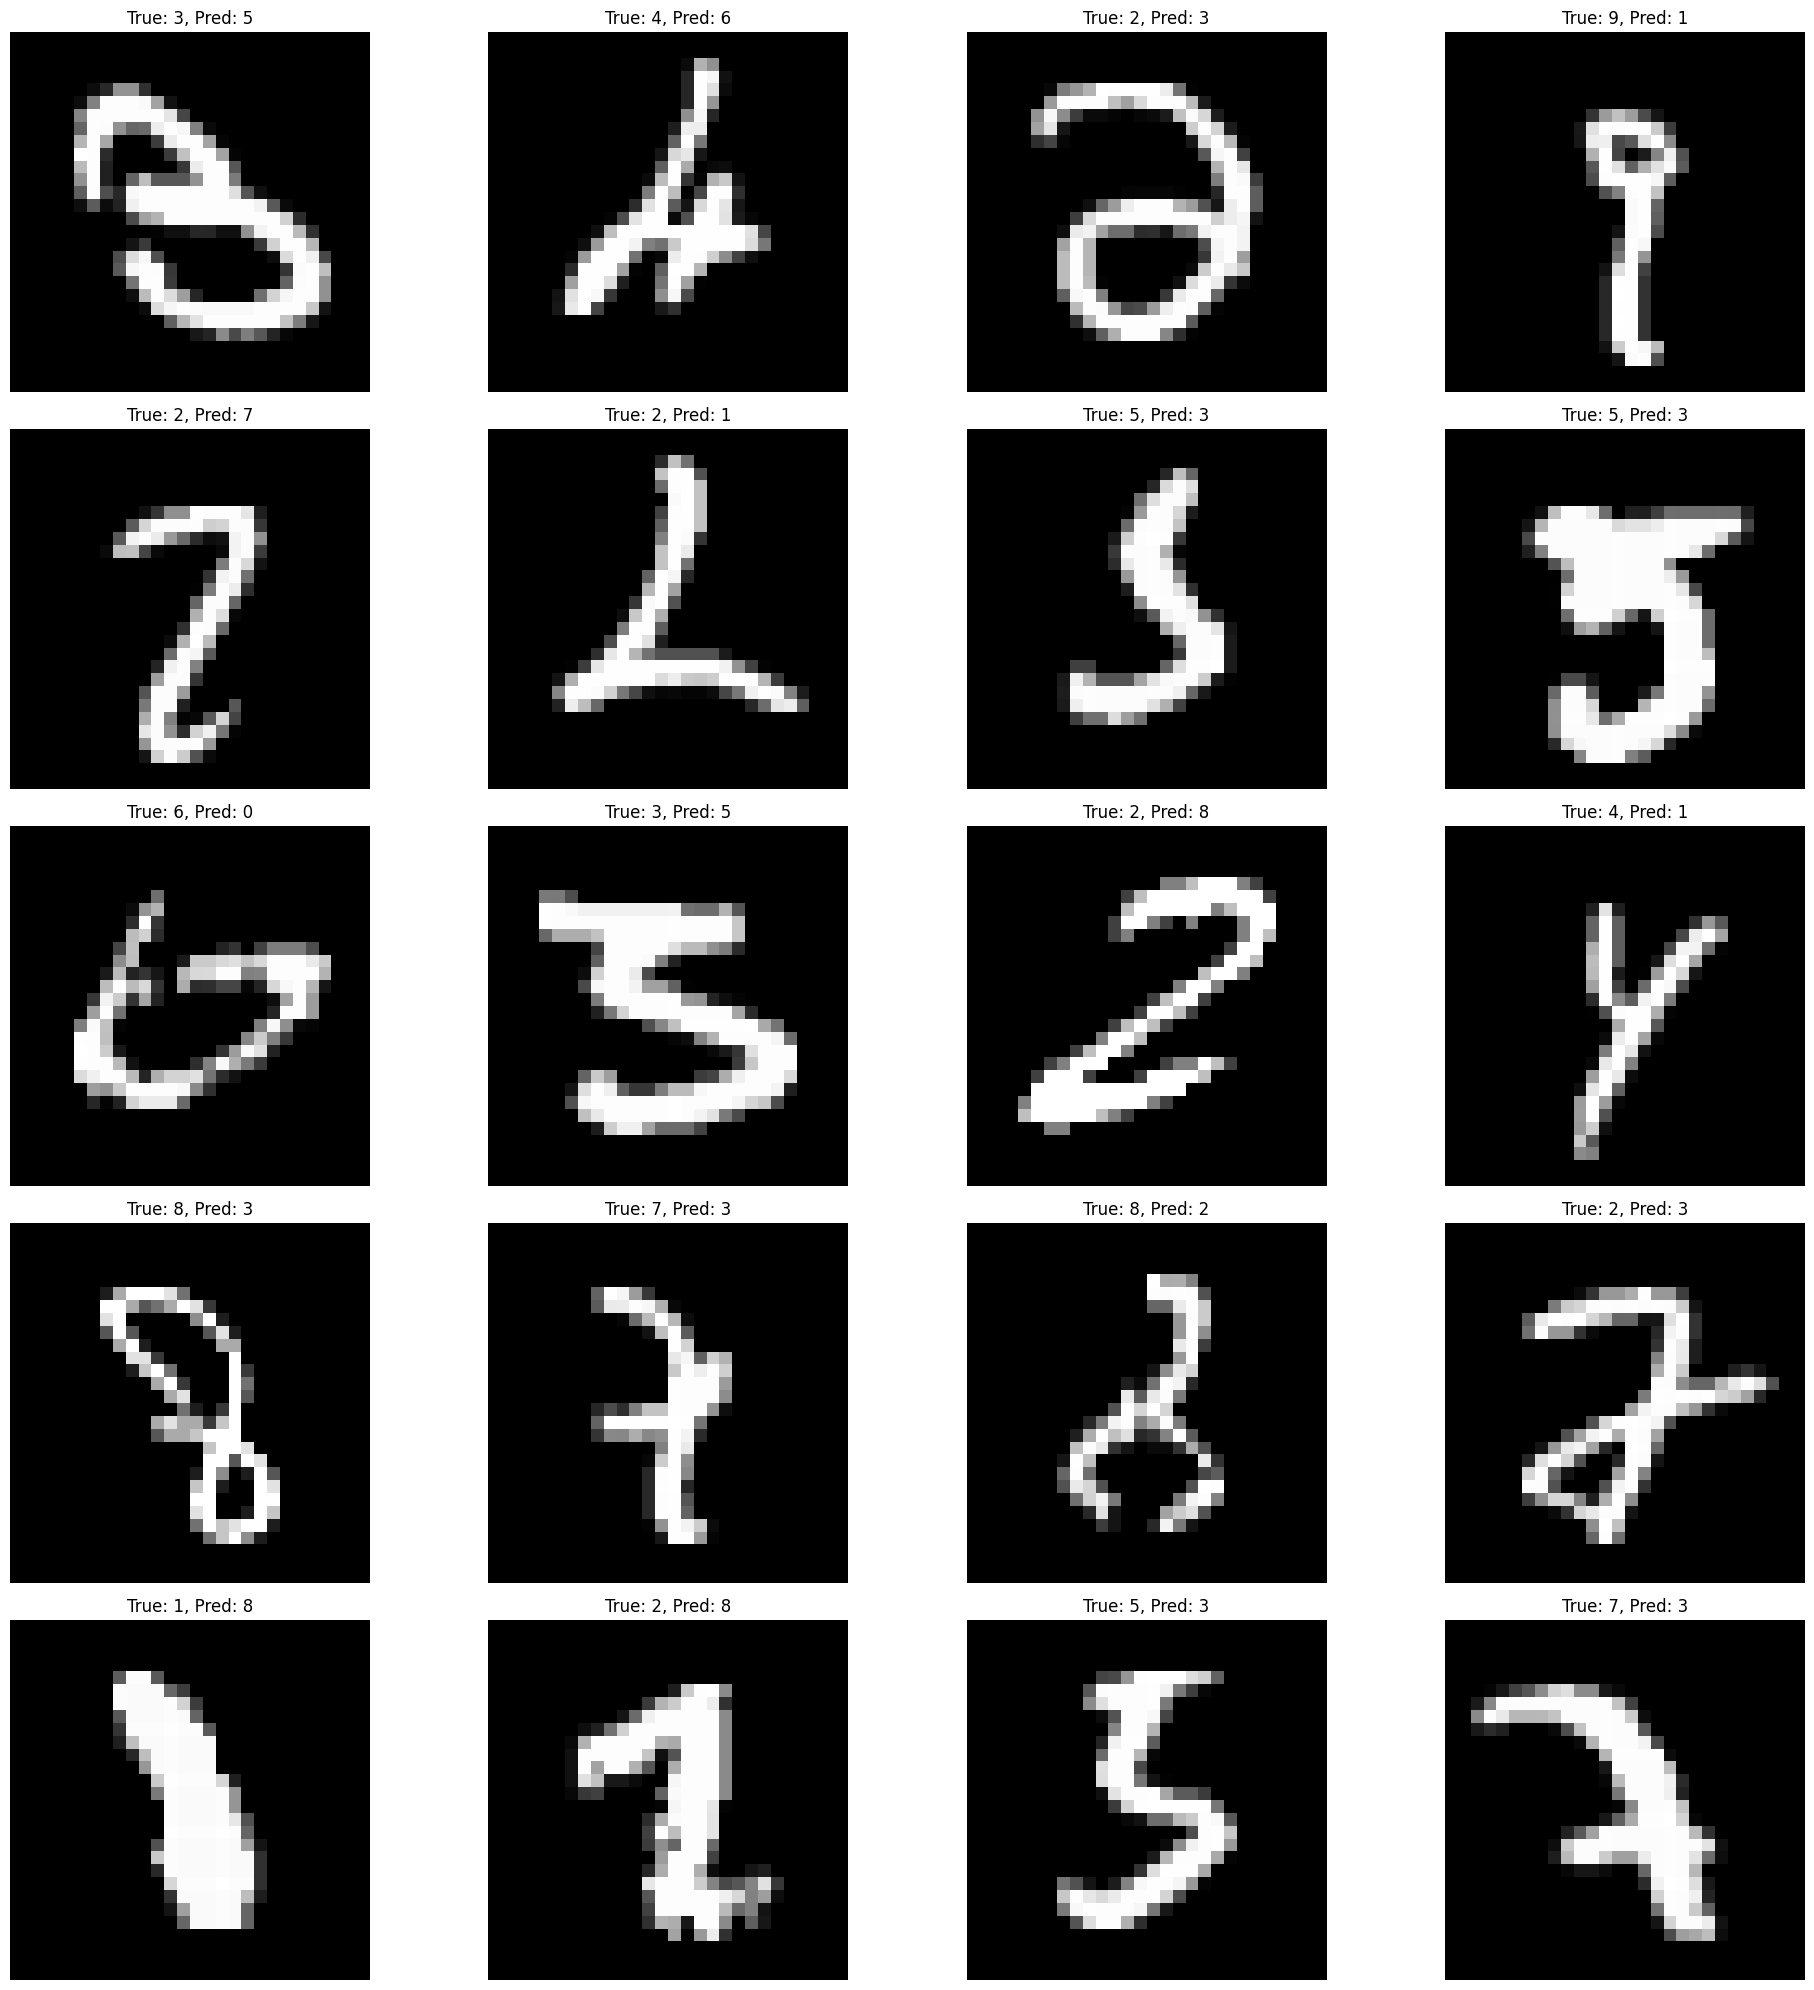

In [174]:
predicted_labels = np.argmax(model.predict(x_test), axis=1)
true_labels = np.argmax(y_test, axis=1)

print("Predicted labels:", predicted_labels)
print("True labels:", true_labels)

incorrect_indices = np.where(predicted_labels != true_labels)[0]

print("Indices of incorrect predictions:", incorrect_indices)
print("Number of incorrect predictions:", len(incorrect_indices))

num_to_display = 20
plt.figure(figsize=(20, 20))

for i, idx in enumerate(incorrect_indices[:num_to_display]):
    plt.subplot(5, 4, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap="gray")
    plt.title(f"True: {true_labels[idx]}, Pred: {predicted_labels[idx]}")
    plt.axis("off")

plt.tight_layout()
plt.show()